In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

In [2]:
train_transaction =  dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/train_transaction.csv").to_pandas()
train_identity = dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/train_identity.csv").to_pandas()

# test_transaction = dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/test_transaction.csv").to_pandas()
# test_identity = dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/test_identity.csv").to_pandas()

In [3]:
trainset = pd.merge(train_transaction, train_identity, on='TransactionID', how='outer')

In [4]:
trainset = trainset[["TransactionID","DeviceType","DeviceInfo","TransactionDT","TransactionAmt","ProductCD","card4","card6","P_emaildomain","R_emaildomain","addr1","addr2","dist1","dist2","isFraud"]]

In [5]:
trainset.iloc[:5]

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud
0,2987000,NaN,NaN,86400,68.5,W,discover,credit,,,315.0,87.0,19.0,NaN,False
1,2987001,NaN,NaN,86401,29.0,W,mastercard,credit,gmail.com,,325.0,87.0,NaN,NaN,False
2,2987002,NaN,NaN,86469,59.0,W,visa,debit,outlook.com,,330.0,87.0,287.0,NaN,False
3,2987003,NaN,NaN,86499,50.0,W,mastercard,debit,yahoo.com,,476.0,87.0,NaN,NaN,False
4,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M,86506,50.0,H,mastercard,credit,gmail.com,,420.0,87.0,NaN,NaN,False


In [6]:
trainset.describe()

,TransactionID,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
count,5.905400e+05,5.905400e+05,590540.000000,524834.000000,524834.000000,238269.000000,37627.000000
mean,3.282270e+06,7.372311e+06,135.027176,290.733794,86.800630,118.502180,231.855423
std,1.704744e+05,4.617224e+06,239.162522,101.741072,2.690623,371.872026,529.053494
min,2.987000e+06,8.640000e+04,0.251000,100.000000,10.000000,0.000000,0.000000
25%,3.134635e+06,3.027058e+06,43.321000,204.000000,87.000000,3.000000,7.000000
50%,3.282270e+06,7.306528e+06,68.769000,299.000000,87.000000,8.000000,37.000000
75%,3.429904e+06,1.124662e+07,125.000000,330.000000,87.000000,24.000000,206.000000
max,3.577539e+06,1.581113e+07,31937.391000,540.000000,102.000000,10286.000000,11623.000000


In [117]:
trainset['TransactionDT_day'] = trainset['TransactionDT'].apply(lambda x: int(x/86400))
trainset['TransactionDT_hour'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24))
trainset['TransactionDT_min'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24%1*60))
trainset['TransactionDT_sec'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24%1*60%1*60))

Question 2
----------

In [118]:
most_freq_country_code = trainset['addr2'].value_counts().idxmax()
addr2_set = trainset[trainset['addr2'] == most_freq_country_code]

In [9]:
addr2_set['TransactionDT'][60000:60005]

67055    1528548
67056    1528563
67057    1528580
67058    1528587
67059    1528589
Name: TransactionDT, dtype: int32

In [119]:
addr2_set.iloc[60000:60005]

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud,TransactionDT_day,TransactionDT_hour,TransactionDT_min,TransactionDT_sec
67055,3054055,mobile,iOS Device,1528548,150.00,H,mastercard,credit,gmail.com,gmail.com,126.0,87.0,NaN,NaN,False,17,16,35,48
67056,3054056,NaN,NaN,1528563,107.95,W,discover,credit,hotmail.com,,436.0,87.0,2.0,NaN,False,17,16,36,2
67057,3054057,NaN,NaN,1528580,94.95,W,mastercard,debit,aol.com,,315.0,87.0,NaN,NaN,False,17,16,36,19
67058,3054058,NaN,NaN,1528587,29.00,W,mastercard,debit,gmail.com,,269.0,87.0,1.0,NaN,False,17,16,36,26
67059,3054059,NaN,NaN,1528589,261.95,W,mastercard,debit,verizon.net,,494.0,87.0,1.0,NaN,False,17,16,36,28


Text(0, 0.5, 'Number of Transactions')

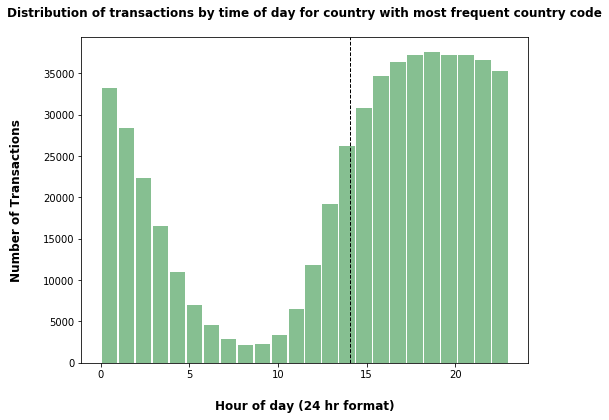

In [139]:
hist1 = addr2_set['TransactionDT_hour'].hist(bins=24, grid=False, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)
hist1.axvline(addr2_set['TransactionDT_hour'].mean(), color='k', linestyle='dashed', linewidth=1)

hist1.set_title("Distribution of transactions by time of day for country with most frequent country code", pad=20, fontweight='bold', fontsize=12)

hist1.set_xlabel("Hour of day (24 hr format)", labelpad=20, weight='bold', size=12)
hist1.set_ylabel("Number of Transactions", labelpad=20, weight='bold', size=12)

Question 3
----------

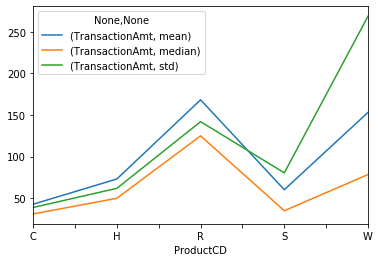

In [101]:
trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([np.mean, np.median, np.std]).plot()

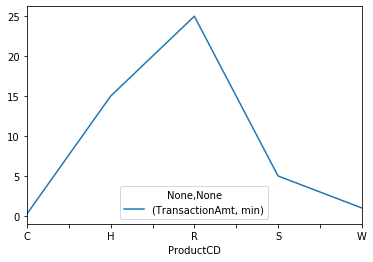

In [98]:
trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([min]).plot()

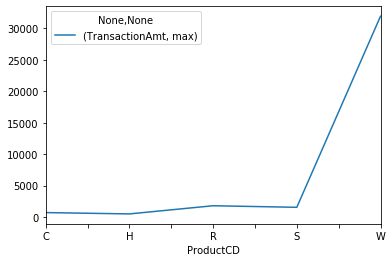

In [99]:
trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([max]).plot()

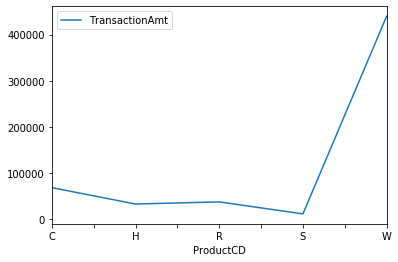

In [100]:
trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).count().plot()

Question 4
----------

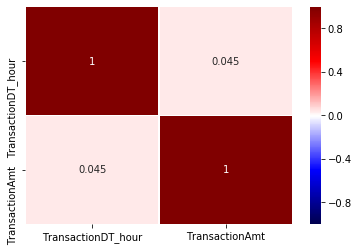

In [124]:
sns.heatmap(trainset[['TransactionDT_hour', 'TransactionAmt']].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True)

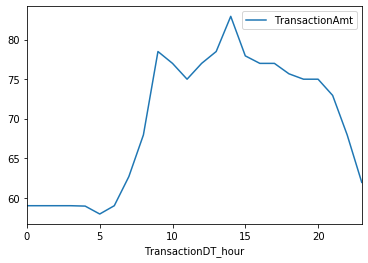

In [145]:
trainset[['TransactionDT_hour', 'TransactionAmt']].groupby(['TransactionDT_hour']).median().plot()

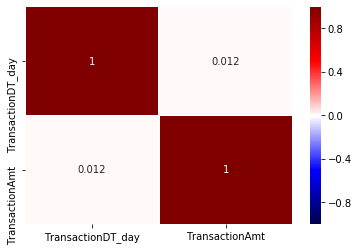

In [155]:
sns.heatmap(trainset[['TransactionDT_day', 'TransactionAmt']].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True)

In [ ]:
# plot time for fraudulent transactions